## 1. 데이터 살펴보기

* 모든 *parquet* 확장자 파일 확인

In [1]:
import os
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
VER = 1

# check the reading of one parquet for understanding

BASE_PATH = './kaggle/input/hms-harmful-brain-activity-classification/'

df = pd.DataFrame({'path': glob(BASE_PATH + '**/*.parquet')})
# df['test_type'] = df['path'].str.split('/').str.get(-2).str.split('_').str.get(-1)
# df['id'] = df['path'].str.split('/').str.get(-1).str.split('.').str.get(0)

# In Window...
df['test_type'] = df['path'].str.split('\\').str.get(-2).str.split('_').str.get(-1)
df['id'] = df['path'].str.split('\\').str.get(-1).str.split('.').str.get(0)
df.head()

,path,test_type,id
0,./kaggle/input/hms-harmful-brain-activity-clas...,eegs,3911565283
1,./kaggle/input/hms-harmful-brain-activity-clas...,spectrograms,853520
2,./kaggle/input/hms-harmful-brain-activity-clas...,eegs,1000913311
3,./kaggle/input/hms-harmful-brain-activity-clas...,eegs,1001369401
4,./kaggle/input/hms-harmful-brain-activity-clas...,eegs,1001487592


* 특정 eeg_id에 해당하는 EEG 확인 

In [2]:
df_eeg = pd.read_parquet(BASE_PATH + 'train_eegs/1000913311.parquet')
df_eeg.head()

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-105.849998,-89.230003,-79.459999,-49.230000,-99.730003,-87.769997,-53.330002,-50.740002,-32.250000,-42.099998,-43.270000,-88.730003,-74.410004,-92.459999,-58.930000,-75.739998,-59.470001,8.210000,66.489998,1404.930054
1,-85.470001,-75.070000,-60.259998,-38.919998,-73.080002,-87.510002,-39.680000,-35.630001,-76.839996,-62.740002,-43.040001,-68.629997,-61.689999,-69.320000,-35.790001,-58.900002,-41.660000,196.190002,230.669998,3402.669922
2,8.840000,34.849998,56.430000,67.970001,48.099998,25.350000,80.250000,48.060001,6.720000,37.880001,61.000000,16.580000,55.060001,45.020000,70.529999,47.820000,72.029999,-67.180000,-171.309998,-3565.800049
3,-56.320000,-37.279999,-28.100000,-2.820000,-43.430000,-35.049999,3.910000,-12.660000,8.650000,3.830000,4.180000,-51.900002,-21.889999,-41.330002,-11.580000,-27.040001,-11.730000,-91.000000,-81.190002,-1280.930054
4,-110.139999,-104.519997,-96.879997,-70.250000,-111.660004,-114.430000,-71.830002,-61.919998,-76.150002,-79.779999,-67.480003,-99.029999,-93.610001,-104.410004,-70.070000,-89.250000,-77.260002,155.729996,264.850006,4325.370117


* visualization of Fp1, F3 and C3 of 1000913311 (by using line graph of matplotlib)

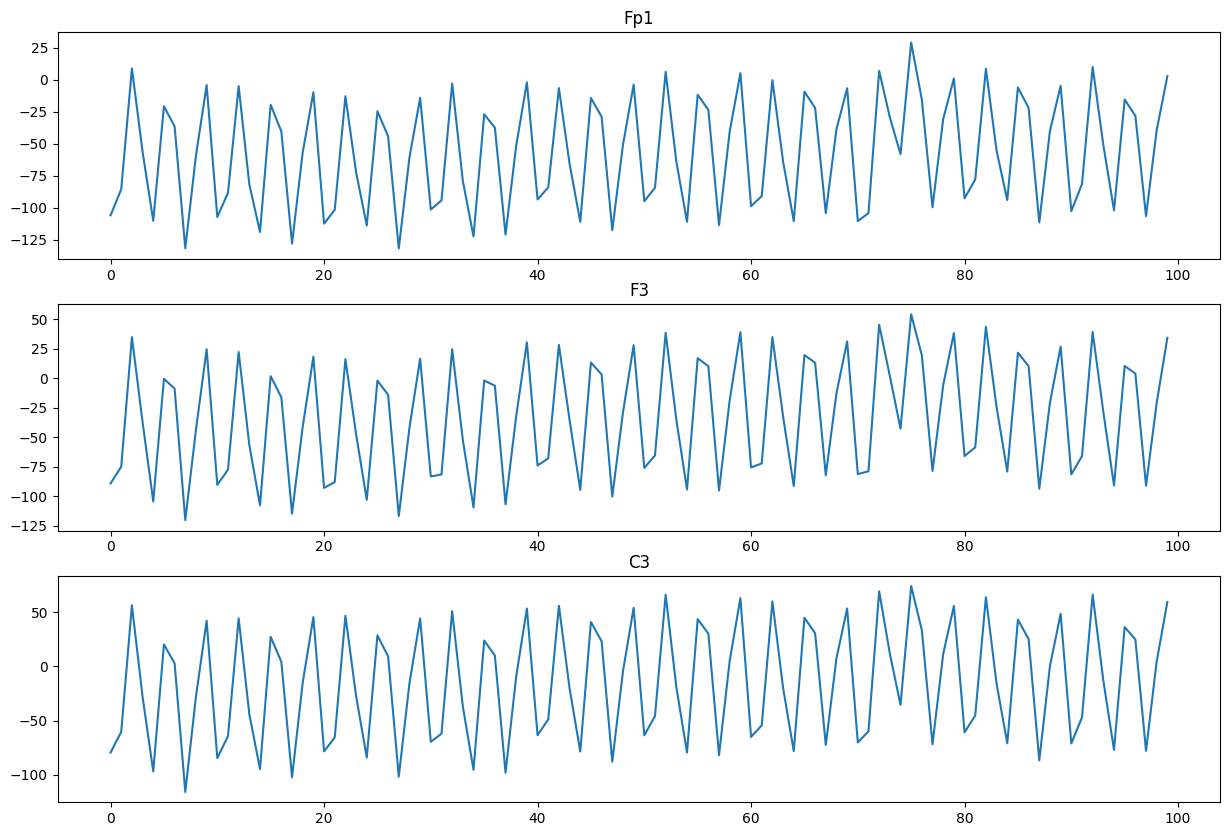

In [3]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(df_eeg.Fp1.index[:100], df_eeg.Fp1.values[:100])
plt.title('Fp1')
plt.subplot(3, 1, 2)
plt.plot(df_eeg.F3.index[:100], df_eeg.F3.values[:100])
plt.title('F3')
plt.subplot(3, 1, 3)
plt.plot(df_eeg.C3.index[:100], df_eeg.C3.values[:100])
plt.title('C3')
plt.show()

In [4]:
# row = time point column = channel
print(df_eeg.shape, n_channels:=df_eeg.shape[1])

(10000, 20) 20


* train data 확인

In [5]:
df = pd.read_csv('./kaggle/input/hms-harmful-brain-activity-classification/train.csv')
TARGETS = df.columns[-6:]
print(f'Train shape: {df.shape} \nTargets: {list(TARGETS)}' )
df

Train shape: (106800, 15) 
Targets: ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0


## Train data
기존 train data는 각각의 egg_id에 서로 다른 EEG recording이 존재합니다. 하지만 test data는 unique한 행 하나만 존재합니다. 따라서 unique한 egg_id를 만들기 위해 다음과 같은 처리를 합니다.

* egg_id로 데이터를 group화 합니다.

* spectrogram_label_offset_seconds값만 남깁니다
    * min: Egg segment의 starting point
    * max: Egg segment의 end point
    
* target = 확률로 변환

In [6]:
train = df.groupby('eeg_id')[['spectrogram_id','spectrogram_label_offset_seconds']].agg(
    {'spectrogram_id':'first','spectrogram_label_offset_seconds':'min'})
train.columns = ['spec_id','min']

tmp = df.groupby('eeg_id')[['spectrogram_id','spectrogram_label_offset_seconds']].agg(
    {'spectrogram_label_offset_seconds':'max'})
train['max'] = tmp

tmp = df.groupby('eeg_id')[['patient_id']].agg('first') 
train['patient_id'] = tmp

tmp = df.groupby('eeg_id')[['expert_consensus']].agg('first')
train['target'] = tmp

tmp = df.groupby('eeg_id')[TARGETS].agg('sum')
for t in TARGETS:
    train[t] = tmp[t].values

y_data = train[TARGETS].values 
y_data = y_data / y_data.sum(axis=1,keepdims=True)
train[TARGETS] = y_data
    
train = train.reset_index()
print('Train non-overlapp eeg_id shape:', train.shape )
train.head()

Train non-overlapp eeg_id shape: (17089, 12)


,eeg_id,spec_id,min,max,patient_id,target,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,568657,789577333,0.0,16.0,20654,Other,0.0,0.000000,0.25,0.000000,0.166667,0.583333
1,582999,1552638400,0.0,38.0,20230,LPD,0.0,0.857143,0.00,0.071429,0.000000,0.071429
2,642382,14960202,1008.0,1032.0,5955,Other,0.0,0.000000,0.00,0.000000,0.000000,1.000000
3,751790,618728447,908.0,908.0,38549,GPD,0.0,0.000000,1.00,0.000000,0.000000,0.000000
4,778705,52296320,0.0,0.0,40955,Other,0.0,0.000000,0.00,0.000000,0.000000,1.000000


In [7]:
READ_SPEC_FILES = False
FEATURE_ENGINEER = True

PATH = './kaggle/input/hms-harmful-brain-activity-classification/train_spectrograms/'
files = os.listdir(PATH)
print(f'There are {len(files)} spectrogram parquets')

if READ_SPEC_FILES:    
    spectrograms: dict[int, np.ndarray] = {}
    for i,f in enumerate(files):
        if i%100==0: 
            print(i,', ',end='')
        tmp = pd.read_parquet(f'{PATH}{f}')
        name = int(f.split('.')[0])
        spectrograms[name] = tmp.iloc[:,1:].values
else:
    spectrograms = np.load('./kaggle/input/brain-spectrograms/specs.npy', allow_pickle=True).item()

There are 11138 spectrogram parquets


In [8]:
spectrograms[1000086677]

array([[2.868e+01, 5.399e+01, 6.763e+01, ..., 5.000e-02, 4.000e-02,
        5.000e-02],
       [2.964e+01, 3.896e+01, 4.401e+01, ..., 6.000e-02, 6.000e-02,
        6.000e-02],
       [8.890e+00, 9.020e+00, 1.636e+01, ..., 1.400e-01, 1.300e-01,
        1.400e-01],
       ...,
       [2.400e-01, 1.900e-01, 2.100e-01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [9.900e-01, 1.230e+00, 1.370e+00, ..., 1.000e-02, 1.000e-02,
        1.000e-02],
       [1.810e+00, 2.110e+00, 1.950e+00, ..., 1.000e-02, 1.000e-02,
        1.000e-02]], dtype=float32)

* *1000086677 data* in train_spectrograms

In [9]:
spec_1000086677 = pd.read_parquet(f'{PATH}1000086677.parquet')
spec_1000086677

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,28.680000,53.990002,67.629997,59.880001,50.880001,74.309998,78.480003,63.080002,59.869999,...,0.13,0.14,0.08,0.11,0.04,0.03,0.05,0.05,0.04,0.05
1,3,29.639999,38.959999,44.009998,66.800003,48.509998,42.180000,47.340000,48.599998,40.880001,...,0.15,0.13,0.08,0.08,0.07,0.06,0.07,0.06,0.06,0.06
2,5,8.890000,9.020000,16.360001,23.559999,27.340000,30.040001,27.559999,23.290001,15.120000,...,0.12,0.11,0.08,0.08,0.09,0.10,0.12,0.14,0.13,0.14
3,7,1.770000,1.930000,1.810000,1.600000,1.430000,1.280000,1.190000,1.110000,1.010000,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.04,0.04,0.04
4,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,591,2.210000,2.280000,2.200000,1.280000,1.350000,1.930000,2.300000,2.440000,2.310000,...,0.03,0.03,0.03,0.03,0.03,0.04,0.04,0.03,0.03,0.03
296,593,2.490000,2.540000,2.150000,1.490000,1.360000,1.570000,1.970000,2.050000,1.890000,...,0.02,0.02,0.02,0.03,0.02,0.02,0.02,0.01,0.01,0.01
297,595,0.240000,0.190000,0.210000,0.120000,0.110000,0.080000,0.060000,0.040000,0.040000,...,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00
298,597,0.990000,1.230000,1.370000,1.620000,1.940000,2.190000,2.270000,2.310000,2.300000,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01


## feature engineering

### feature extraction
* 10-minute 내의 mean, min value 추출
* 20-second 내의 mean, min value 추출

In [10]:
import warnings
warnings.filterwarnings('ignore')

# This process results in 1600 features (400 features × 4 calculations) for each EEG ID.
SPEC_COLS = pd.read_parquet(f'{PATH}1000086677.parquet').columns[1:]
FEATURES = [f'{c}_mean_10m' for c in SPEC_COLS]
FEATURES += [f'{c}_min_10m' for c in SPEC_COLS]
FEATURES += [f'{c}_mean_20s' for c in SPEC_COLS]
FEATURES += [f'{c}_min_20s' for c in SPEC_COLS]
print(f'We are creating {len(FEATURES)} features for {len(train)} rows... ',end='')

if FEATURE_ENGINEER:
    print(data := np.zeros((len(train),len(FEATURES))))
    print(data.shape)
    for k in range(len(train)):
        row = train.iloc[k]
        r = int((row['min'] + row['max'])//4)  # Egg segment 4분할
        
        x = np.nanmean(spectrograms[row.spec_id][r:r+300,:],axis=0)
        data[k,:400] = x  # mean_10m = 5m 내의 평균값
        x = np.nanmin(spectrograms[row.spec_id][r:r+300,:],axis=0)
        data[k,400:800] = x  # min_10m = 5m 내의 최솟값
        
        # 20 SECOND WINDOW FEATURES (MEANS and MINS)
        x = np.nanmean(spectrograms[row.spec_id][r+145:r+155,:],axis=0)
        data[k,800:1200] = x  # mean_20s = 10s 내의 평균값
        x = np.nanmin(spectrograms[row.spec_id][r+145:r+155,:],axis=0)
        data[k,1200:1600] = x  # min_20s = 10s 내의 최솟값

    train[FEATURES] = data
else:
    train = pd.read_parquet('/kaggle/input/brain-spectrograms/train.pqt')
print()
print('New train shape:',train.shape)
train.head()

We are creating 1600 features for 17089 rows... [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(17089, 1600)

New train shape: (17089, 1612)


,eeg_id,spec_id,min,max,patient_id,target,seizure_vote,lpd_vote,gpd_vote,lrda_vote,...,RP_18.16_min_20s,RP_18.36_min_20s,RP_18.55_min_20s,RP_18.75_min_20s,RP_18.95_min_20s,RP_19.14_min_20s,RP_19.34_min_20s,RP_19.53_min_20s,RP_19.73_min_20s,RP_19.92_min_20s
0,568657,789577333,0.0,16.0,20654,Other,0.0,0.000000,0.25,0.000000,...,0.20,0.19,0.17,0.16,0.25,0.21,0.17,0.19,0.15,0.13
1,582999,1552638400,0.0,38.0,20230,LPD,0.0,0.857143,0.00,0.071429,...,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.02,0.02,0.02
2,642382,14960202,1008.0,1032.0,5955,Other,0.0,0.000000,0.00,0.000000,...,0.05,0.04,0.07,0.05,0.04,0.06,0.03,0.06,0.05,0.05
3,751790,618728447,908.0,908.0,38549,GPD,0.0,0.000000,1.00,0.000000,...,0.06,0.05,0.05,0.06,0.06,0.06,0.07,0.05,0.05,0.03
4,778705,52296320,0.0,0.0,40955,Other,0.0,0.000000,0.00,0.000000,...,0.15,0.15,0.13,0.13,0.08,0.06,0.06,0.12,0.09,0.04


In [11]:
from scipy import signal

def extract_frequency_band_features(segment):
    # Define EEG frequency bands
    eeg_bands = {
        'Delta': (0.5, 4),
        'Theta': (4, 8),
        'Alpha': (8, 12),
        'Beta': (12, 30),
        'Gamma': (30, 45)
        }
    
    band_features = []
    for band in eeg_bands:
        low, high = eeg_bands[band]
        # Filter signal for the specific band
        band_pass_filter = signal.butter(3, [low, high], btype='bandpass', fs=200, output='sos')
        filtered = signal.sosfilt(band_pass_filter, segment)
        # Extract features like mean, standard deviation, etc.
        band_features.extend(
            [
            np.nanmean(filtered),
            np.nanstd(filtered),
            np.nanmax(filtered),
            np.nanmin(filtered)
            ]
            )
    
    return band_features


* PCA

In [12]:
# from sklearn.impute import SimpleImputer
# from sklearn.decomposition import PCA

# # Initialize a PCA model
# pca = PCA(n_components=0.95)
# print("PCA model initialized.")

# # Initialize an array for original features
# num_rows = len(train)
# num_features = 20 * n_channels  # 20 features per channel
# data_original = np.zeros((num_rows, num_features))

# print("Starting feature extraction and PCA processing...")

# for k in range(num_rows):
#     if k % 1000 == 0:
#         print(f"Processing row {k} of {num_rows}...")

#     row = train.iloc[k]
#     r = int((row['min'] + row['max']) // 4)
#     eeg_segment = spectrograms[row.spec_id][r:r+300, :]

#     # Apply the feature extraction function to each EEG channel
#     all_channel_features = []
#     for i in range(n_channels):
#         channel_features = extract_frequency_band_features(eeg_segment[:, i])
#         all_channel_features.extend(channel_features)
    
#     data_original[k, :] = all_channel_features

# print("Data matrix constructed")

# # Impute NaN values in the data matrix
# imputer = SimpleImputer(strategy='mean')
# data_imputed = imputer.fit_transform(data_original)

# print(f"NaN values handled. Imputed data matrix shape: {data_imputed.shape}")

# # Apply PCA on the imputed data
# pca.fit(data_imputed)
# print("PCA fitting completed.")

# # Transform data using PCA
# data_pca = pca.transform(data_imputed)

# # Add PCA features to DataFrame
# pca_feature_columns = [f'pca_feature_{i}' for i in range(data_pca.shape[1])]
# train[pca_feature_columns] = data_pca

# train.head()

* 데이터 표준화

In [13]:
# from sklearn.preprocessing import StandardScaler

# # Columns to be excluded from scaling
# excluded_columns = ['eeg_id', 'spec_id', 'min', 'max', 'patient_id', 'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote','target']

# # Save the columns to be excluded
# excluded_data = train[excluded_columns]

# # DataFrame with only the columns to be scaled
# features = train.drop(columns=excluded_columns)

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler to the features and transform them
# features_scaled = scaler.fit_transform(features)

# # Create a DataFrame from the scaled features
# features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# # Concatenate the scaled features with the excluded columns
# train_scaled_df = pd.concat([excluded_data.reset_index(drop=True),features_scaled_df,], axis=1)
# train_scaled_df 
# train_scaled_df.info()

## 모델 학습

In [14]:
import xgboost as xgb
import gc
from sklearn.model_selection import GroupKFold

print('XGBoost version', xgb.__version__)

all_oof = []
all_true = []
TARS = {'Seizure':0, 'LPD':1, 'GPD':2, 'LRDA':3, 'GRDA':4, 'Other':5}

gkf = GroupKFold(n_splits=5)
for i, (train_index, valid_index) in enumerate(gkf.split(train , train .target, train .patient_id)):   
    
    print('#'*25)
    print(f'### Fold {i+1}')
    print(f'### train size {len(train_index)}, valid size {len(valid_index)}')
    print('#'*25)
    
    model = xgb.XGBClassifier(
        objective='multi:softprob', 
        num_class=len(TARS),
        learning_rate = 0.1,
        early_stopping_rounds=10
#         tree_method='gpu_hist',  #skip GPU acceleration
    )
    
    # Prepare training and validation data
    X_train = train.loc[train_index, FEATURES]
    y_train = train.loc[train_index, 'target'].map(TARS)
    X_valid = train.loc[valid_index, FEATURES]
    y_valid = train.loc[valid_index, 'target'].map(TARS)
    
    model.fit(X_train, y_train, 
              eval_set=[(X_valid, y_valid)], 
              verbose=True,
              )
    model.save_model(f'./kaggle/output/XGB_v{VER}_f{i}.model')
    
    oof = model.predict_proba(X_valid)
    all_oof.append(oof)
    all_true.append(train.loc[valid_index, TARGETS].values)
    
    del X_train, y_train, X_valid, y_valid, oof
    gc.collect()
    
all_oof = np.concatenate(all_oof)
all_true = np.concatenate(all_true)

XGBoost version 2.1.0
#########################
### Fold 1
### train size 13671, valid size 3418
#########################
[0]	validation_0-mlogloss:1.71072
[1]	validation_0-mlogloss:1.64346
[2]	validation_0-mlogloss:1.58365
[3]	validation_0-mlogloss:1.53520
[4]	validation_0-mlogloss:1.49521
[5]	validation_0-mlogloss:1.46063
[6]	validation_0-mlogloss:1.42735
[7]	validation_0-mlogloss:1.39833
[8]	validation_0-mlogloss:1.37434
[9]	validation_0-mlogloss:1.35276
[10]	validation_0-mlogloss:1.33328
[11]	validation_0-mlogloss:1.31574
[12]	validation_0-mlogloss:1.30035
[13]	validation_0-mlogloss:1.28595
[14]	validation_0-mlogloss:1.27101
[15]	validation_0-mlogloss:1.25712
[16]	validation_0-mlogloss:1.24354
[17]	validation_0-mlogloss:1.23178
[18]	validation_0-mlogloss:1.22192
[19]	validation_0-mlogloss:1.21156
[20]	validation_0-mlogloss:1.20205
[21]	validation_0-mlogloss:1.19391
[22]	validation_0-mlogloss:1.18574
[23]	validation_0-mlogloss:1.17775
[24]	validation_0-mlogloss:1.17100
[25]	validat

## feature Importance 추출(Top30)

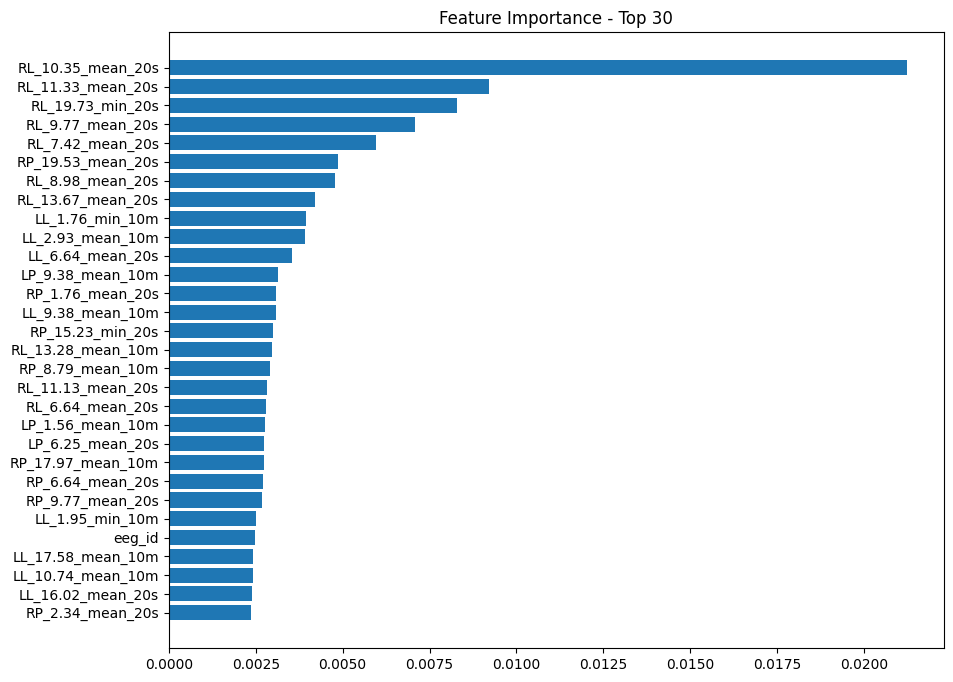

In [15]:
TOP = 30

# Assuming 'model' is your trained model
feature_importance = model.feature_importances_

# Get the feature names from 'train'
feature_names = train.columns

# Sort the feature importances and get the indices of the sorted array
sorted_idx = np.argsort(feature_importance)

# Plot only the top 'TOP' features
fig = plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(sorted_idx))[-TOP:], feature_importance[sorted_idx][-TOP:], align='center')
plt.yticks(np.arange(len(sorted_idx))[-TOP:], feature_names[sorted_idx][-TOP:])
plt.title(f'Feature Importance - Top {TOP}')
plt.show()

## Test data Feature Engineering

In [16]:
test = pd.read_csv('./kaggle/input/hms-harmful-brain-activity-classification/test.csv')
print('Test shape',test.shape)
test.head()

Test shape (1, 3)


,spectrogram_id,eeg_id,patient_id
0,853520,3911565283,6885


In [17]:
# PATH2 = './kaggle/input/hms-harmful-brain-activity-classification/test_spectrograms/'
# spec = pd.read_parquet(f'{PATH2}{853520}.parquet')
# spec.head()

In [18]:
# # READ ALL TEST SPECTROGRAMS
# PATH2 = './kaggle/input/hms-harmful-brain-activity-classification/test_spectrograms/'
# files = os.listdir(PATH2)
# print(f'There are {len(files)} spectrogram parquets')

# spectrograms_test = {}
# for i,f in enumerate(files):
#     tmp = pd.read_parquet(f'{PATH2}{f}')
#     name = int(f.split('.')[0])
#     spectrograms_test[name] = tmp.iloc[:,1:].values

In [19]:
# %time
# # ENGINEER FEATURES
# import warnings
# warnings.filterwarnings('ignore')

# # The code generates features from the spectrogram data for use in a model 
# # The features are derived by calculating the mean and minimum values over time for each of the 400 spectrogram frequencies.
# # Two types of windows are used for these calculations:
# # A 10-minute window (_mean_10m, _min_10m).
# # A 20-second window (_mean_20s, _min_20s).
# # This process results in 1600 features (400 features × 4 calculations) for each EEG ID.

# SPEC_COLS = pd.read_parquet(f'{PATH}1000086677.parquet').columns[1:]
# FEATURES = [f'{c}_mean_10m' for c in SPEC_COLS]
# FEATURES += [f'{c}_min_10m' for c in SPEC_COLS]
# FEATURES += [f'{c}_mean_20s' for c in SPEC_COLS]
# FEATURES += [f'{c}_min_20s' for c in SPEC_COLS]
# print(f'We are creating {len(FEATURES)} features for {len(test)} rows... ',end='')


# # A data matrix data is initialized to store the new features for each eeg_id in the train DataFrame.
# # For each row in train, the code calculates the mean and minimum values within the specified 10-minute and 20-second windows.
# # These calculated values are then stored in the data matrix.
# # Finally, the matrix is added to the train DataFrame as new columns.

# data = np.zeros((len(test),len(FEATURES)))
# for k in range(len(test)):
#     if k%100==0: print(k,', ',end='')
#     row = test.iloc[k]
            
#     # 10 MINUTE WINDOW FEATURES
#     x = np.nanmean( spec.iloc[:,1:].values, axis=0)
#     data[k,:400] = x
#     x = np.nanmin( spec.iloc[:,1:].values, axis=0)
#     data[k,400:800] = x

#     # 20 SECOND WINDOW FEATURES
#     x = np.nanmean( spec.iloc[145:155,1:].values, axis=0)
#     data[k,800:1200] = x
#     x = np.nanmin( spec.iloc[145:155,1:].values, axis=0)
#     data[k,1200:1600] = x

#     test[FEATURES] = data

    
# print()
# print('New test shape:',test.shape)

In [20]:
# from sklearn.impute import SimpleImputer
# from sklearn.decomposition import PCA

# # Initialize a PCA model
# pca = PCA(n_components=0.95)
# print("PCA model initialized.")

# # Initialize an array for original features
# num_rows = len(test)
# num_features = 20 * n_channels  # 20 features per channel
# data_original = np.zeros((num_rows, num_features))

# print("Starting feature extraction and PCA processing...")

# for k in range(num_rows):
#     if k % 1000 == 0:
#         print(f"Processing row {k} of {num_rows}...")

#     row = train.iloc[k]
#     r = int((row['min'] + row['max']) // 4)
#     eeg_segment = spectrograms_test[853520][r:r+300, :]

#     # Apply the feature extraction function to each EEG channel
#     all_channel_features = []
#     for i in range(n_channels):
#         channel_features = extract_frequency_band_features(eeg_segment[:, i])
#         all_channel_features.extend(channel_features)
    
#     data_original[k, :] = all_channel_features

# print("Data matrix constructed")

# # Impute NaN values in the data matrix
# imputer = SimpleImputer(strategy='mean')
# data_imputed = imputer.fit_transform(data_original)

# print(f"NaN values handled. Imputed data matrix shape: {data_imputed.shape}")

# # Apply PCA on the imputed data
# pca.fit(data_imputed)
# print("PCA fitting completed.")

# # Transform data using PCA
# data_pca = pca.transform(data_imputed)

# # Add PCA features to DataFrame
# pca_feature_columns = [f'pca_feature_{i}' for i in range(data_pca.shape[1])]
# test[pca_feature_columns] = data_pca

# test.head()

In [21]:
# # Columns to be excluded from scaling
# excluded_columns = ['eeg_id', 'spectrogram_id', 'patient_id']

# # Save the columns to be excluded
# excluded_data = test[excluded_columns]

# # DataFrame with only the columns to be scaled
# features = test.drop(columns=excluded_columns)

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler to the features and transform them
# features_scaled = scaler.fit_transform(features)

# # Create a DataFrame from the scaled features
# features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# # Concatenate the scaled features with the excluded columns
# test_scaled_df = pd.concat([excluded_data.reset_index(drop=True),features_scaled_df,], axis=1)
# test_scaled_df 

In [22]:
# FEATURE ENGINEER TEST
PATH2 = './kaggle/input/hms-harmful-brain-activity-classification/test_spectrograms/'
data = np.zeros((len(test),len(FEATURES)))
    
for k in range(len(test)):
    row = test.iloc[k]
    s = int( row.spectrogram_id )
    spec = pd.read_parquet(f'{PATH2}{s}.parquet')
    
    # 10 MINUTE WINDOW FEATURES
    x = np.nanmean( spec.iloc[:,1:].values, axis=0)
    data[k,:400] = x
    x = np.nanmin( spec.iloc[:,1:].values, axis=0)
    data[k,400:800] = x

    # 20 SECOND WINDOW FEATURES
    x = np.nanmean( spec.iloc[145:155,1:].values, axis=0)
    data[k,800:1200] = x
    x = np.nanmin( spec.iloc[145:155,1:].values, axis=0)
    data[k,1200:1600] = x

test[FEATURES] = data
print('New test shape',test.shape)

New test shape (1, 1603)


In [23]:
# INFER XGBOOST ON TEST
preds = []

for i in range(5):
    print(i, ', ', end='')
    
    # Load the XGBoost model
    model = xgb.XGBClassifier()
    model.load_model(f'./kaggle/output/XGB_v{VER}_f{i}.model')
    
    # Make predictions
    pred = model.predict_proba(test[FEATURES])
    preds.append(pred)

# Average the predictions from each fold
pred = np.mean(preds, axis=0)
print()
print('Test preds shape', pred.shape)

0 , 1 , 2 , 3 , 4 , 
Test preds shape (1, 6)


In [24]:
sub = pd.DataFrame({'eeg_id':test.eeg_id.values})
sub[TARGETS] = pred
sub.to_csv('submission.csv',index=False)
print('Submission shape',sub.shape)
sub.head()

Submission shape (1, 7)


,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,3911565283,0.142299,0.055694,0.006008,0.103847,0.035721,0.65643


In [25]:
# SANITY CHECK TO CONFIRM PREDICTIONS SUM TO ONE
sub.iloc[:,-6:].sum(axis=1)

0    1.0
dtype: float32